In [50]:
%matplotlib widget

In [51]:
import numpy as np
import scipy as sp

from numpy.linalg import norm

import matplotlib.pyplot as plt

c = lambda *x: np.array([*x])

# ADDLIN. HW1
Михайло Корешков

## Задача 1. Ортогональна проекція точки $M$ на пряму $AB$

$M(1,1,1), A(2,-2,3), B(1,0,1)$

Скалярний добуток $AM \cdot AB$ чисельно дорівнює довжині проекції (зі знаком) $AM$ на $AB$, помноженій на довжину вектора $AB$.
$$\vec{AM} \cdot \vec{AB} = Pr_{AB}AM \cdot |AB|$$
Це можна використати для пошуку координат проекції $M$ на $AB$. Назвемо цю проекцію $M'$.
$$\vec{M'} = \vec{A} + \frac{\vec{AB}}{|AB|} \cdot \frac{\vec{AM} \cdot \vec{AB}}{|AB|}$$
Де $\frac{\vec{AB}}{|AB|}$ це одиничний напрямний вектор прямої

In [63]:
M = c(1,1,1)
A = c(2,-2,3)
B = c(1,0,1)

In [64]:
AM = M - A
AB = B - A
coord_on_line = AM @ AB / (norm(AB)**2)
print("coord on line: ", coord_on_line)
M1 = projection_coords = A + AB * coord_on_line
print("projection coords: ", projection_coords)

norm(M - M1)

coord on line:  1.2222222222222223
projection coords:  [0.77777778 0.44444444 0.55555556]


0.7453559924999299

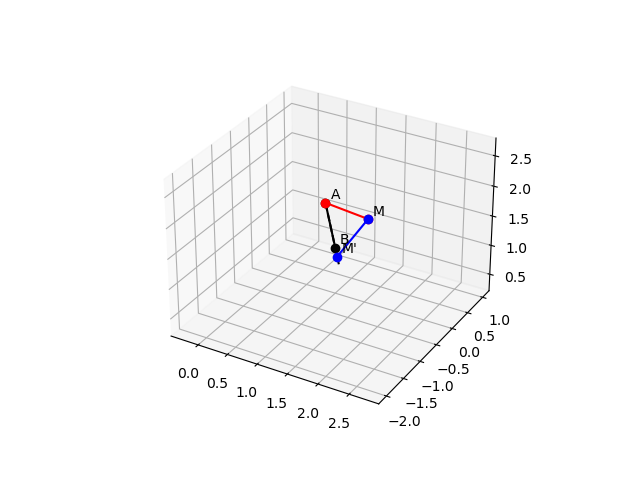

In [65]:
ax = plt.figure().add_subplot(projection='3d')

B1 = A + AB*1.5

ax.text(*A+0.05, "A")
ax.text(*B+0.05, "B")
ax.text(*M+0.05, "M")
ax.text(*M1+0.05, "M'")
ax.plot([2,B1[0]], [-2,B1[1]], [3,B1[2]], '--', c='k', label="AB")
ax.plot([2,1], [-2,0], [3,1], 'o-', c='k', label="AB")
ax.plot([2,1], [-2,1], [3,1], 'o-', c='r', label="AM")
ax.plot([M1[0],1], [M1[1],1], [M1[2],1], 'o-', c='b', label="MM'")

ax.set_aspect('equal')

## Задача 2. Знайти ортогональну проекцію точки на пряму, задану рівнянням
$$M(1,2,1),\quad l: \frac{x}{2}=\frac{y-4}{5}=\frac{z+1}{3}$$

Тут суть в тому щоб використати параметричний вигляд прямої.


$$\frac{x}{2}=\frac{y-4}{5}=\frac{z+1}{3} = t$$
$$\begin{cases}
x = 2t\\
y = 5t + 4\\
z = 3t + 1
\end{cases}$$
У якості деякої точки на прямій можна взяти $A(t=0) = A(0,4,1)$.  
Вектор коефіцієнтів при $t$ є напрямним вектором прямої $\vec l(2,5,3)$.  
Тоді
$$\vec x = t\cdot \vec l + \vec A$$

Нехай проекція $M$ на $l$ це $M'(x,y,z) \in l$.
Тоді справедливо $\vec l \cdot MM' = 0$, тобто
$$\vec l \cdot (\vec x - \vec M) = 0$$
$$\vec l \cdot (t\vec l + \vec A - \vec M) = 0$$
$$t |\vec l|^2 + \vec l \cdot (\vec A - \vec M) = 0$$
$$t = -\frac{\vec l \cdot (\vec A - \vec M)}{|\vec l|^2}$$
А зі значення параметру можна отримати координати проекції $M'$:
$$\vec {M'} = t\cdot \vec l + \vec A = \vec A + \vec l\cdot \frac{\vec l \cdot \vec {AM}}{|\vec l|^2}$$

In [59]:
l = c(2,5,3)
A = c(0,4,1)
M = c(1,2,1)
AM = M - A

t = ( l @ AM )/(norm(l)**2)
print("t = ", t)

M1 = A + l*t
print("projection coords = ", M1)

print("MM' * l = ", (M1-M)@l)

t =  -0.21052631578947373
projection coords =  [-0.42105263  2.94736842  0.36842105]
MM' * l =  -8.881784197001252e-16


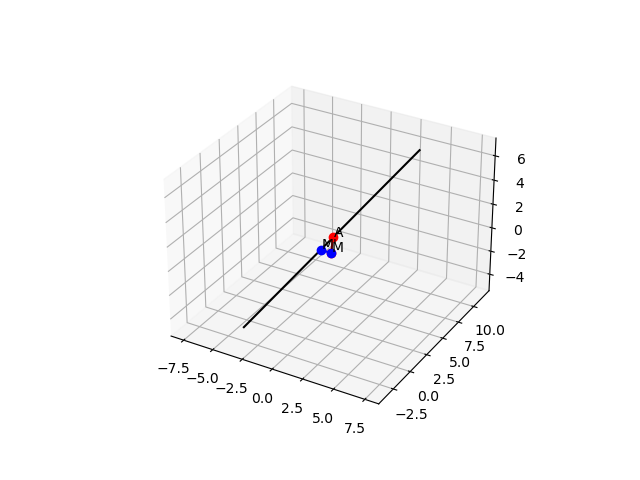

In [61]:
ax = plt.figure().add_subplot(projection='3d')

A1 = A - l*1.5
B1 = A + l*1.5

ax.text(*A+0.05, "A")
ax.text(*M+0.05, "M")
ax.text(*M1+0.05, "M'")
ax.plot([A1[0],B1[0]], [A1[1],B1[1]], [A1[2],B1[2]], '-', c='k', label="line")
ax.plot([A[0],M[0]], [A[1],M[1]], [A[2],M[2]], 'o-', c='r', label="AM")
ax.plot([M1[0],M[0]], [M1[1],M[1]], [M1[2],M[2]], 'o-', c='b', label="MM'")

ax.set_aspect('equal')

## Задача 3. Подумати про обмеженість диференційовних кривих.

> Нехай $F(x,y) = 0$ - диференційовна крива $\Gamma$ в $\mathbb R^2$.  
> Нехай $\forall (x,y) \in \mathbb R^2: |F(x,y)| < 10$.  
> Чи може $\Gamma$ бути обмеженою кривою? (Обмежена в сенсі "можна помістити в кулю скінченного радіусу").  





Розглянемо коло радіусу 1:
$$\Gamma: x^2 + y^2 = 1$$
Відповідний функціонал:
$$F(x,y) = x^2 + y^2 - 1$$
Цей функціонал неперервно диференціюється, але приймає необмежено великі значення при віддаленні від початку координат.
Хочу спробувати перетворити його дифеоморфізмом до іншого, що матиме значення в діапазоні $(-1,1)$

Розгляну стандарнту логістичну функцію, зсунуту на $0.5$ вниз та розтягнуту в 2 рази. 
$$s(t) = \frac{2}{1 + e^{-t}} - 1$$
$s : (-\infty, +\infty) \to (-1,1)$, при чому $s$ - бієктивна та диференційовна разом із своєю оберненою.  
При чому 
$$s(0) = 0, \quad s(-\infty) = -1,\quad s(+\infty) = +1$$
Нехай 
$$G(x,y) = s(F(x,y)) = \frac{1}{1 + \exp(1-x^2-y^2)}$$
тоді  
$x^2 + y^2 = 1 \implies F(x,y) = 0 \implies G(x,y) = 0$  
$x^2 + y^2 < 1 \implies F(x,y) < 0 \implies G(x,y) < 0$  
$x^2 + y^2 = 0 \implies F(x,y) = -1 \implies G(x,y) = const > -1$  
$x^2 + y^2 > 0 \implies F(x,y) > 0 \implies G(x,y) \in (0, 1)$  

**Тобто знайшли обмежений диференційовний функціонал, що задає обмежену криву** 

---

# Практика

## Задача 1. Відстань до трикутника
Точка $M$, трикутник $ABC$

In [67]:
M = np.array((-1,-1))

A = np.array((1,1))
B = np.array((2,3))
C = np.array((4,-1))

AB = B - A
BC = C - B
AC = C - A

print(f"AB {AB}, BC {BC}, AC {AC}")

AB [1 2], BC [ 2 -4], AC [ 3 -2]


За Теоремою, найменша відстань від точки до багатокутника - це відстань від точки до однієї з його вершин чи однієї з його сторін.

Обчислюємо всі відстані до вершин та відстані до сторін

Відстані до вершин це просто $|MA| = |(M_x - A_x, M_y - A_y)|$.

Відстані до сторін обчислюється як відстань від точки $M$ до прямої з відомим напрямним вектором (напр. $AB$).
Але спочатку потрібно переконатись, що точка ближча до прямої, що проходить через сторону, а не до однієї з вершин.

У випадку $M$ та сторони $AB$, це можна перевірити обчисливши координату проекції $AM$ на $AB$ і переконавшись, що вона між 0 та 1.
$$t = \frac{\vec{AB} \cdot \vec{AM}}{|\vec{AB}|^2} \in (0,1)$$
<!-- $$Pr_{AB}AM = \frac{\vec{AB} \cdot \vec{AM}}{|\vec{AB}|^2} \cdot \vec{AB}$$ -->

Якщо умова виконана, то відстань можна обчислити як відстань до точки на прямій зі знайденою координатою
$$\vec {M'} = \vec A + t\cdot \vec{AB}$$

In [68]:
# відстані до вершин
dMA = norm(M - A)
dMB = norm(M - B)
dMC = norm(M - C)
print(f"dMA = {dMA:.2f}, dMB = {dMB:.2f}, dMC = {dMC:.2f}")

dMA = 2.83, dMB = 5.00, dMC = 5.00


In [73]:
AM = M-A
BM = M-B

# проекція M на AB
tAB = AB @ AM / norm(AB)**2
tBC = BC @ BM / norm(BC)**2
tAC = AC @ AM / norm(AC)**2

print(f"tAB = {tAB:.2f}, tBC = {tBC:.2f}, tAC = {tAC:.2f}")

if (0 < tAB < 1):
    M1_AB = A + AB * tAB
    dM_AB = norm(M - M1_AB)
    print(f"tAB in (0,1). Distance dM_AB = {dM_AB:.2f}")
if (0 < tBC < 1):
    M1_BC = B + BC * tBC
    dM_BC = norm(M - M1_BC)
    print(f"tBC in (0,1). Distance dM_BC = {dM_BC:.2f}")
if (0 < tAC < 1):
    M1_AC = A + AC * tAC
    dM_AC = norm(M - M1_AC)
    print(f"tAC in (0,1). Distance dM_AC = {dM_AC:.2f}")

tAB = -1.20, tBC = 0.50, tAC = -0.15
tBC in (0,1). Distance dM_BC = 4.47


Маємо відстані 2.83, 5, 5 до вершин та відстань 4.47 до сторони BC. Для інших сторін точка проектується поза трикутником.

Таким чином відстань до трикутника - 4.47

## Задача 2. Обхід вершин опуклого полігона

> Дано 4-кутник ABCD.  
> $A(2,2), B(2,-2), C(-1,1), D(1,-1)$  
> Чи лежить точка $M(1.5, 0)$ всередині фігури?




In [155]:
%matplotlib inline

In [156]:
A = c(2,2)
B = c(2,-2)
C = c(-1,1)
D = c(1,-1)

M = c(1.5,0)

AB = B-A
BC = C-B
CD = D-C
DA = A-D

points = c(A,B,C,D,A).T
points

array([[ 2,  2, -1,  1,  2],
       [ 2, -2,  1, -1,  2]])

Text(1, -1, 'D')

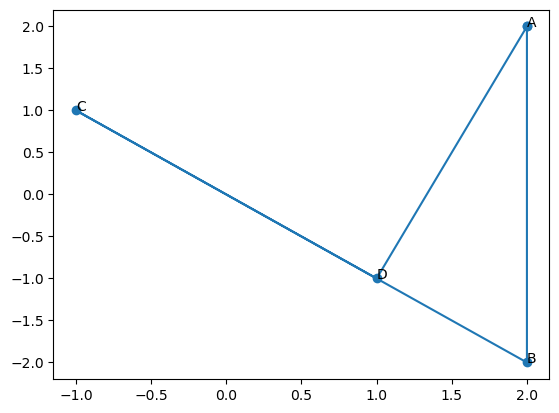

In [157]:
plt.figure()
plt.plot(*points, 'o-')
plt.text(*A, 'A')
plt.text(*B, 'B')
plt.text(*C, 'C')
plt.text(*D, 'D')

Почну з розгляду інших опуклих випадків. По-перше, можна звернути увагу, що кожна сторона многокутника ділить простір на 2 частини.  
Таким чином перевіривши чи точка лежить по правильний бік всіх сторін можна визначити чи вона всередині фігури.  
Для неопуклих многокутників це не спрацює, бо, за визначенням, пряма проведена через одну зі сторін ділить многокутник на два.  

Визначення сторони, по яку знаходиться точка, виконується так чи інакше порівнянням функціоналу прямої з нулем. Але спочатку треба знати по який бік знаходиться фігура.
Це можна дізнатися взявши будь-яку вершину, функціонал якої не дорівнює нулю.

Також можна довести, що будь-яка опукла лінійна комбінація точок границі опуклої множини дає точку, що також належить цій опуклій множині.  
Це можна використати для декількох цілей:
1. Пошук точки, що гарантовано знаходиться всередині фігури (наприклад взявши середнє всіх вершин, "центроїд")
2. Таким чином можна обґрунтувати можливість розкладу точки по новому базису, створеному зі сторін многокутника, та розміщеного в одній з вершин.  
    Тоді точка знаходитиметься всередині фігури якщо її можна представити як опуклу лінійну комбінацію, тобто якщо сума координат менше деякого значення

In [158]:
A = c(1,1)
B = c(2,3)
C = c(3,2)
D = c(3,0)
points = c(A,B,C,D)

In [159]:
def show_polygon(points):
    A,B,C,D = points
    plt.figure()
    plt.plot(*(c(A,B,C,D,A).T), 'o-')
    plt.text(*A, 'A')
    plt.text(*B, 'B')
    plt.text(*C, 'C')
    plt.text(*D, 'D')

def show_p(point, name="M", *args, **kwargs):
    plt.scatter([point[0]], [point[1]], *args, **kwargs)
    plt.text(*point, name)

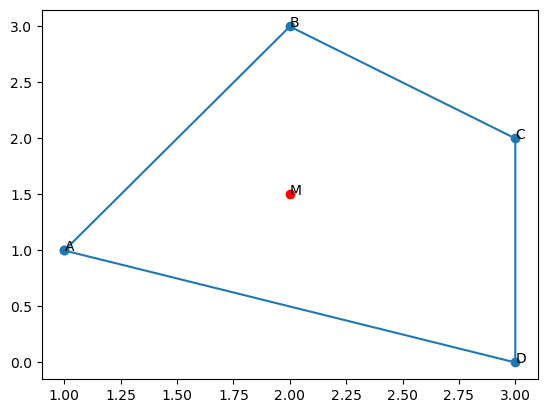

In [160]:
M = c(2,1.5)

show_polygon(points)
show_p(M, c='r')

Але в принципі, можна піти навіть простішим шляхом. Звернемо увагу, що точка знаходиться всередині опуклого полігону 
тоді і лише тоді коли вона проектується на всі його сторони (тобто, ортогональна проекція точки на лінію, що проходить через відрізок, залишається в межах відрізку).

In [161]:
# calculate projection
def proj(point, a, b):
    l = b-a
    v = point-a
    p1 = (v @ l)/norm(l)**2 * l + a
    return p1

# calculate pseudo-coords
def calc_pc(points, M):
    # масив сторін многокутника
    sides = []
    for i in range(points.shape[0]-1):
        sides.append(points[i+1]-points[i])
    sides.append(points[0]-points[-1])
    S = np.array(sides)
    
    # масив векторів від початку сторони до тестової точки
    V = M - points
    # масив "координат"
    T = (S*V).sum(axis=1) / norm(S, axis=1)**2
    return T


Coord along AB = 0.400
Coord along BC = 0.750
Coord along CD = 0.250
Coord along DA = 0.700


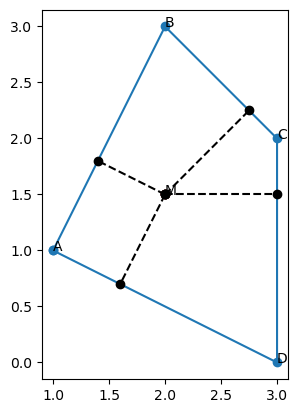

In [162]:
show_polygon(points)

projs = [proj(M, A, B), proj(M, B, C), proj(M, C, D), proj(M, D, A),]
for p in projs:
    data = c(M,p).T
    plt.plot(*data, 'o--', c='k')

show_p(M, c='r')
plt.gca().set_aspect(1)

T = calc_pc(points, M)
for t, side_name in zip(T, ['AB','BC','CD','DA']):
    warn = ''
    if not (0 < t < 1): warn = ' !!!'
    print(f"Coord along {side_name} = {t:.3f}{warn}")

На рисунку вище видно, що точка всередині проектується всередину відрізків, а всі "координати" лежать у межах від 0 до 1.

Coord along AB = 0.240
Coord along BC = 0.200
Coord along CD = 0.200
Coord along DA = 1.120 !!!


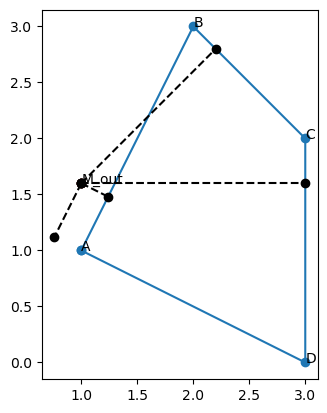

In [163]:
M_out = c(1,1.6)


show_polygon(points)

projs = [proj(M_out, A, B), proj(M_out, B, C), proj(M_out, C, D), proj(M_out, D, A),]
for p in projs:
    data = c(M_out,p).T
    plt.plot(*data, 'o--', c='k')

show_p(M_out, name='M_out', c='r')
plt.gca().set_aspect(1)

T = calc_pc(points, M_out)
for t, side_name in zip(T, ['AB','BC','CD','DA']):
    warn = ''
    if not (0 < t < 1): warn = ' !!!'
    print(f"Coord along {side_name} = {t:.3f}{warn}")

На рисунку вище видно, що точка проектується всередину всіх відрізків окрім одного. Всі відповідні "координати" лежать у межах від 0 до 1 окрім тієї, що відповідає DA.

Coord along AB = -0.600 !!!
Coord along BC = 0.500
Coord along CD = 1.000 !!!
Coord along DA = 1.200 !!!


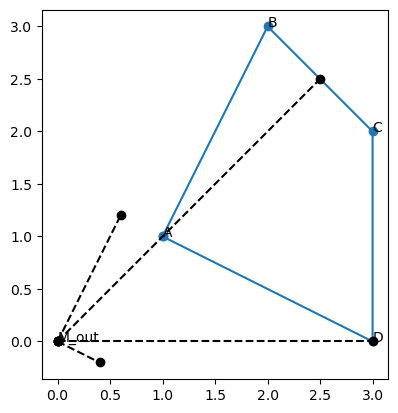

In [164]:
M_out = c(0,0)


show_polygon(points)

projs = [proj(M_out, A, B), proj(M_out, B, C), proj(M_out, C, D), proj(M_out, D, A),]
for p in projs:
    data = c(M_out,p).T
    plt.plot(*data, 'o--', c='k')

show_p(M_out, name='M_out', c='r')
plt.gca().set_aspect(1)

T = calc_pc(points, M_out)
for t, side_name in zip(T, ['AB','BC','CD','DA']):
    warn = ''
    if not (0 < t < 1): warn = ' !!!'
    print(f"Coord along {side_name} = {t:.3f}{warn}")

На рисунку вище видно, що точка проектується ззовні всіх відрізків окрім одного. Всі відповідні "координати" лежать поза межами від 0 до 1 окрім тієї, що відповідає BC, на яку точка успішно спроектувалась.

Тепер перевіримо на завданні

Coord along AB = 0.500
Coord along BC = 0.417
Coord along CD = 0.875
Coord along DA = 0.350


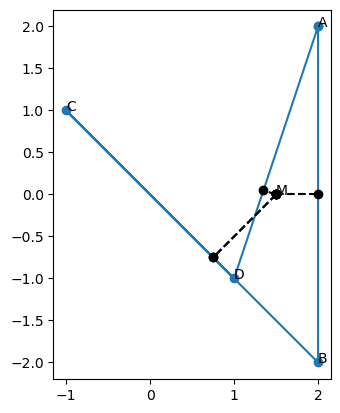

In [166]:
A = c(2,2)
B = c(2,-2)
C = c(-1,1)
D = c(1,-1)

M = c(1.5,0)

AB = B-A
BC = C-B
CD = D-C
DA = A-D

points = c(A,B,C,D)
points

show_polygon(points)

projs = [proj(M, A, B), proj(M, B, C), proj(M, C, D), proj(M, D, A),]
for p in projs:
    data = c(M,p).T
    plt.plot(*data, 'o--', c='k')

show_p(M, c='r')
plt.gca().set_aspect(1)

T = calc_pc(points, M)
for t, side_name in zip(T, ['AB','BC','CD','DA']):
    warn = ''
    if not (0 < t < 1): warn = ' !!!'
    print(f"Coord along {side_name} = {t:.3f}{warn}")

Бачимо, що всі "координати" в межах від 0 до 1, тобто вважаємо, що точка лежить всередині фігури. Це збігається з рисунком